data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/train.csv")
df.head(10)

id              type  fiberID   psfMag_u   psfMag_g   psfMag_r   psfMag_i  \
0   0               QSO      601  23.198224  21.431953  21.314148  21.176553   
1   1               QSO      788  21.431355  20.708104  20.678850  20.703420   
2   2               QSO      427  17.851451  16.727898  16.679677  16.694640   
3   3               QSO      864  20.789900  20.040371  19.926909  19.843840   
4   4    STAR_RED_DWARF      612  26.454969  23.058767  21.471406  19.504961   
5   5  SERENDIPITY_BLUE       76  19.781358  19.315942  19.431752  19.600843   
6   6               QSO      696  22.227121  21.120919  20.715289  20.575474   
7   7          STAR_BHB       14  17.024278  15.786268  15.524910  15.500176   
8   8               QSO      384  20.793464  20.773064  20.607211  20.362645   
9   9     STAR_CATY_VAR       38  20.628414  18.315460  16.993596  15.979193   

    psfMag_z  fiberMag_u  fiberMag_g     ...      petroMag_u  petroMag_g  \
0  21.171444   22.581309   21.644453     ...       22.504317   21.431636   
1  20.473229   21.868797   21.029773     ...       21.360701   20.778968   
2  16.641788   18.171890   17.033098     ...       17.867253   16.738784   
3  19.463270   21.039030   20.317165     ...       20.433907   19.993727   
4  18.389096   25.700632   23.629122     ...       25.859229   22.426929   
5  19.674611   20.167919   19.661686     ...       19.982358   19.390363   
6  20.214773   22.765383   21.275343     ...       21.954245   21.039226   
7  15.527453   17.336320   16.063400     ...       17.093958   15.804802   
8  20.256067   21.183702   21.089308     ...       21.121991   20.756746   
9  15.436727   20.970155   18.656975     ...       20.475790   18.369660   

   petroMag_r  petroMag_i  petroMag_z  modelMag_u  modelMag_g  modelMag_r  \
0   21.478312   21.145409   20.422446   22.749241   21.465534   21.364187   
1   20.889705   20.639812   20.646660   21.492955   20.758527   20.753925   
2   16.688874   16.744210   16.808006   17.818063   16.697434   16.641249   
3   19.985531   19.750917   19.455117   20.770711   20.001699   19.889798   
4   21.673551   19.610012   18.376141   24.877052   23.147993   21.475342   
5   19.552879   19.688197   19.799425   19.899462   19.325313   19.469356   
6   20.721977   20.576279   19.699959   22.081704   21.063189   20.726611   
7   15.625482   15.569017   15.593497   17.037058   15.747645   15.556542   
8   20.721068   20.344337   20.028693   20.945573   20.709594   20.577917   
9   17.012885   16.034479   15.515003   20.621694   18.310723   16.973572   

   modelMag_i  modelMag_z  
0   21.020605   21.147340  
1   20.693389   20.512314  
2   16.660177   16.688928  
3   19.758113   19.552855  
4   19.487330   18.375655  
5   19.598653   19.677858  
6   20.578269   20.657361  
7   15.500731   15.498295  
8   20.307847   20.459722  
9   15.976650   15.446872  

[10 rows x 23 columns]

In [3]:
df.shape

(199991, 23)

In [4]:
print("Columns : ", df.columns,"\n\n")
features = df.columns[2:]
feature_group = ['psfMag', 'fiberMag', 'petroMag', 'modelMag',]
types = df['type'].unique()
print("Types of orb : ", df['type'].unique())
# df['type'].value_counts()
# sns.countplot(y='type', data=df)

Columns :  Index(['id', 'type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z'],
      dtype='object') 


Types of orb :  ['QSO' 'STAR_RED_DWARF' 'SERENDIPITY_BLUE' 'STAR_BHB' 'STAR_CATY_VAR'
 'SERENDIPITY_DISTANT' 'GALAXY' 'SPECTROPHOTO_STD' 'REDDEN_STD' 'ROSAT_D'
 'STAR_WHITE_DWARF' 'SERENDIPITY_RED' 'STAR_CARBON' 'SERENDIPITY_FIRST'
 'STAR_BROWN_DWARF' 'STAR_SUB_DWARF' 'SKY' 'SERENDIPITY_MANUAL' 'STAR_PN']


In [5]:
# df.info()
df[features].describe()

fiberID      psfMag_u       psfMag_g       psfMag_r  \
count  199991.000000  1.999910e+05  199991.000000  199991.000000   
mean      360.830152 -6.750146e+00      18.675373      18.401235   
std       225.305890  1.187678e+04     155.423024     127.128078   
min         1.000000 -5.310802e+06  -40022.466071  -27184.795793   
25%       174.000000  1.965259e+01      18.701180      18.048572   
50%       349.000000  2.087136e+01      19.904235      19.454492   
75%       526.000000  2.216043e+01      21.150297      20.515936   
max      1000.000000  1.877392e+04    3538.984910    3048.110913   

            psfMag_i       psfMag_z    fiberMag_u     fiberMag_g  \
count  199991.000000  199991.000000  1.999910e+05  199991.000000   
mean       18.043495      17.663526  1.084986e+01      19.072693   
std       116.622194     123.735298  4.172116e+03     749.256162   
min    -26566.310827  -24878.828280 -1.864766e+06 -215882.917191   
25%        17.747663      17.425523  1.994040e+01      18.902851   
50%        19.043895      18.611799  2.104910e+01      20.069038   
75%        20.073528      19.883760  2.233754e+01      21.385830   
max      4835.218639    9823.740407  4.870154e+03  248077.513380   

          fiberMag_r     fiberMag_i      ...           petroMag_u  \
count  199991.000000  199991.000000      ...        199991.000000   
mean       19.134483      18.183331      ...            21.837903   
std        90.049058     122.378972      ...           789.472333   
min    -21802.656144  -20208.516262      ...        -24463.431833   
25%        18.259352      17.903615      ...            19.247795   
50%        19.631419      19.188763      ...            20.366848   
75%        20.773911      20.331419      ...            21.797480   
max     12084.735440    8059.638535      ...        298771.019041   

          petroMag_g     petroMag_r     petroMag_i     petroMag_z  \
count  199991.000000  199991.000000  199991.000000  199991.000000   
mean       18.454136      18.481525      17.686617      17.699207   
std       154.376277      97.240448     145.730872     142.691880   
min    -25958.752324  -23948.588523  -40438.184078  -30070.729379   
25%        18.113933      17.479794      17.050294      16.804705   
50%        19.586559      19.182789      18.693370      18.174592   
75%        21.004397      20.457491      20.019112      19.807652   
max     12139.815877    7003.136546    9772.190537   17403.789263   

          modelMag_u     modelMag_g     modelMag_r     modelMag_i  \
count  199991.000000  199991.000000  199991.000000  199991.000000   
mean       20.110991      18.544375      18.181544      17.692395   
std       122.299062     161.728183     133.984475     131.183416   
min    -26236.578659  -36902.402336  -36439.638493  -38969.416822   
25%        19.266214      18.076120      17.423425      16.977671   
50%        20.406840      19.547674      19.143156      18.641756   
75%        21.992898      20.962386      20.408140      19.968846   
max     14488.251976   10582.058590   12237.951703    4062.499371   

          modelMag_z  
count  199991.000000  
mean       17.189281  
std       133.685138  
min    -26050.710196  
25%        16.705774  
50%        18.100997  
75%        19.819554  
max      7420.534172  

[8 rows x 21 columns]

In [6]:
df.groupby(["fiberID"]).size()
# 광섬유의 종류는 총 100개로 10 ~ 300개까지 다양한 개수가 사용되었다.

fiberID
1       296
2       349
3       277
4       317
5       263
6       332
7       293
8       344
9       276
10      312
11      296
12      330
13      290
14      365
15      267
16      343
17      281
18      349
19      316
20      338
21      252
22      336
23      276
24      302
25      308
26      311
27      293
28      362
29      272
30      295
       ... 
971      20
972      68
973      21
974      78
975      23
976      86
977      20
978      73
979      21
980      67
981      19
982      72
983      28
984      72
985      15
986      72
987      25
988      64
989      28
990      73
991      10
992      64
993      17
994      60
995      28
996      72
997      14
998      75
999      27
1000     67
Length: 1000, dtype: int64

Text(0.5,0,'Frequency [%]')

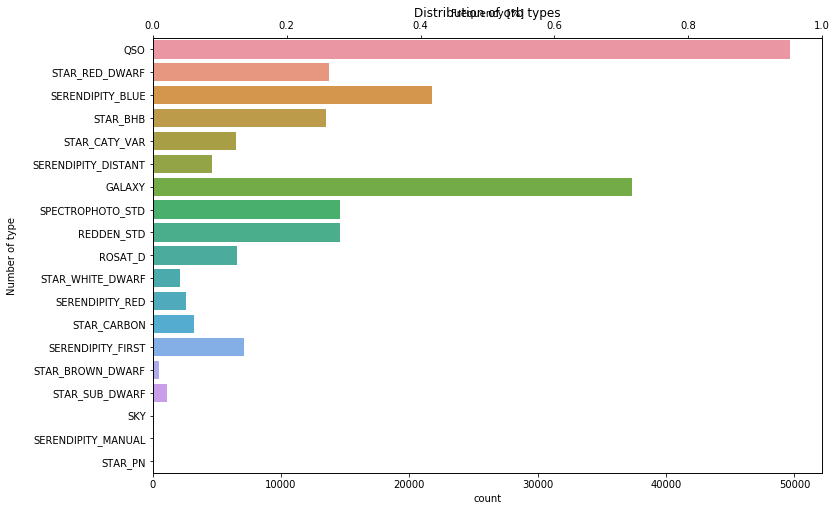

In [9]:
plt.figure(figsize=(12,8))
ax = sns.countplot(y="type", data=df)
plt.title('Distribution of orb types\n')
plt.ylabel('Number of type\n')

# Make twin axis
ax2=ax.twiny()

# Switch so count axis is on right, frequency on left
ax2.xaxis.tick_top()
ax.xaxis.tick_bottom()

# Also switch the labels over
ax.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')

ax2.set_xlabel('Frequency [%]')


각 관측값의 빛의 종류에 따른 분포정도를 확인하기 위해 box plot 확인

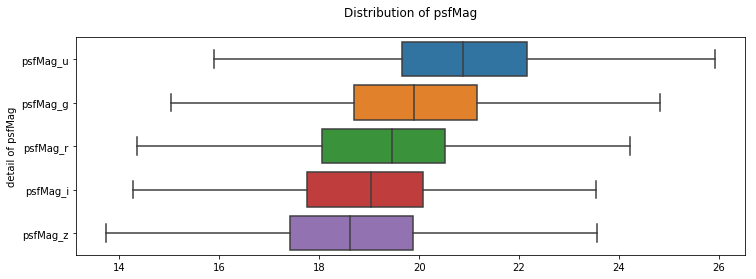

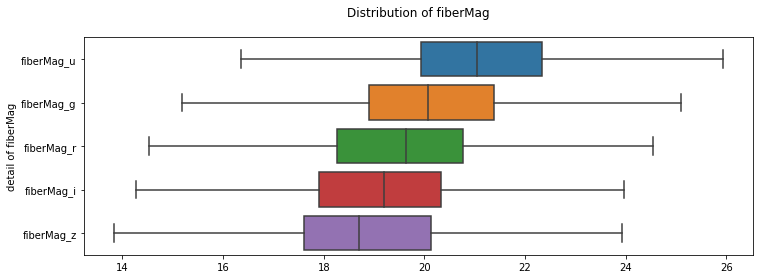

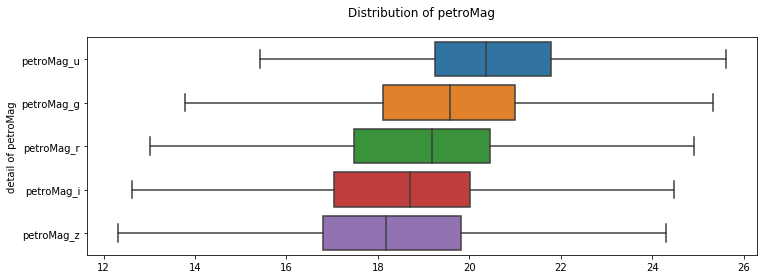

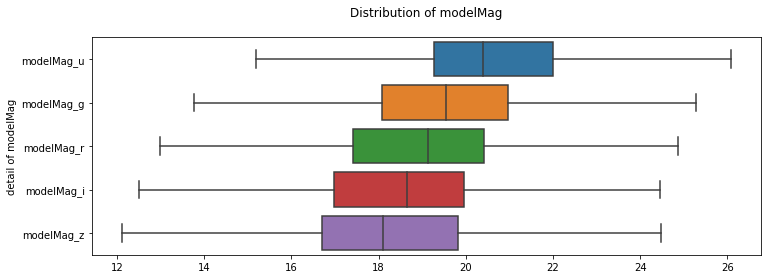

In [10]:

for fg in feature_group :
    plt.figure(figsize=(12,4))
    temp = []
    for i in [x for x in features if fg in x]:
        temp.append(i)
    data = df[temp]
    sns.boxplot(data = data, orient = 'h', showfliers = False)
    plt.title('Distribution of %s\n'%fg)
    plt.ylabel('detail of %s'%fg)

특징들의 분포 모양 확인 

21


/root/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/root/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


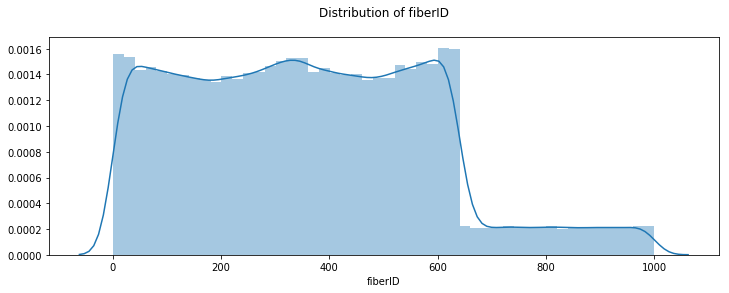

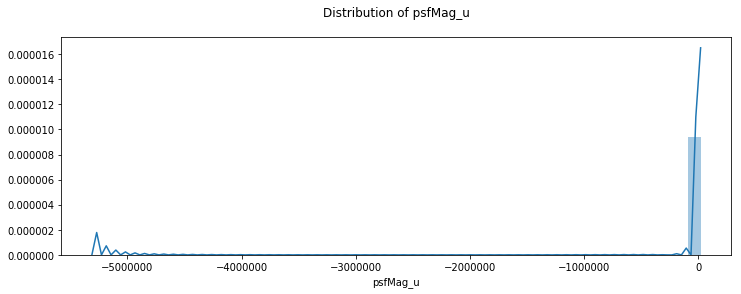

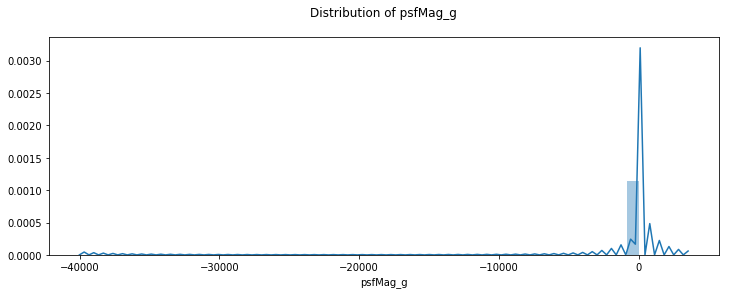

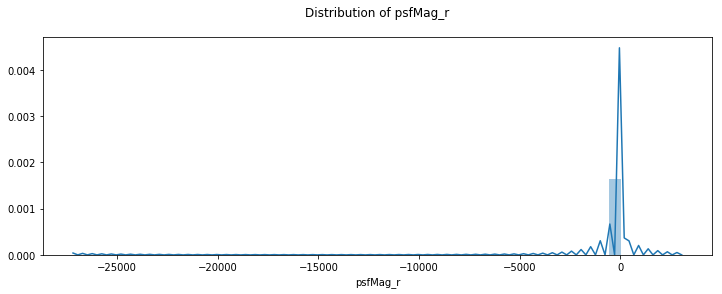

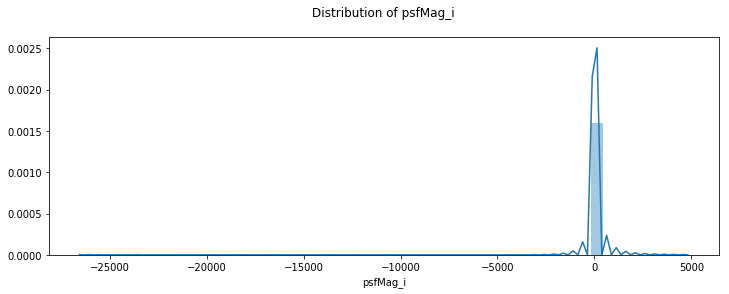

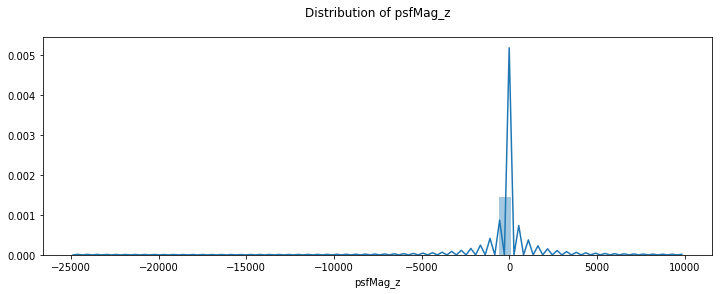

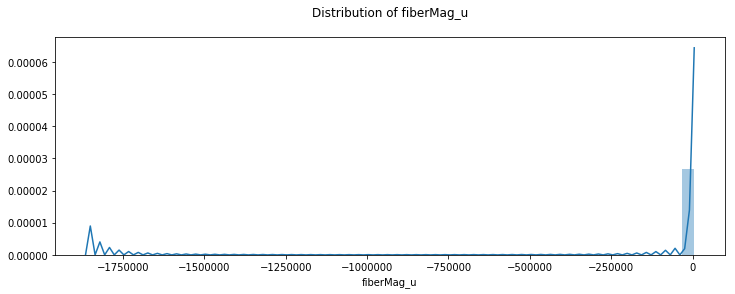

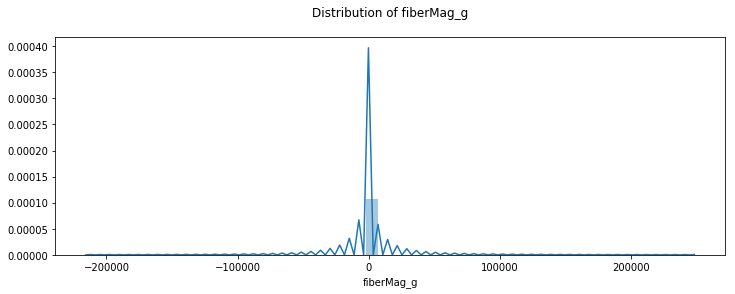

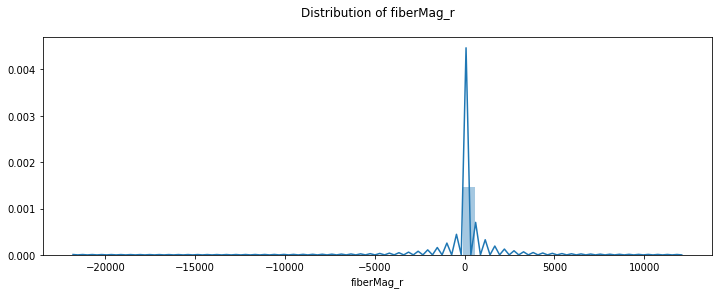

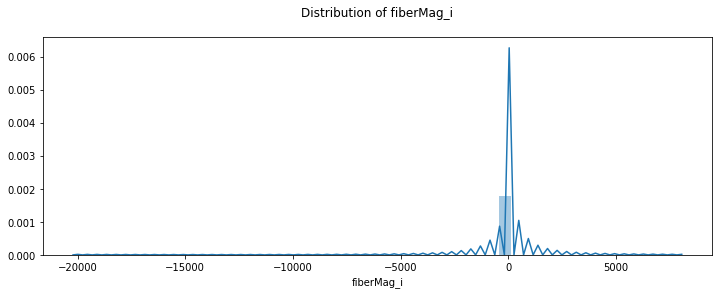

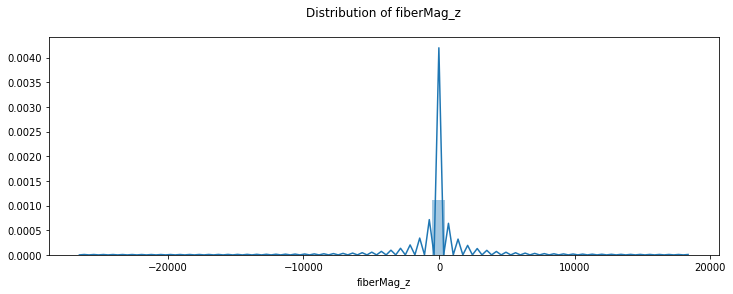

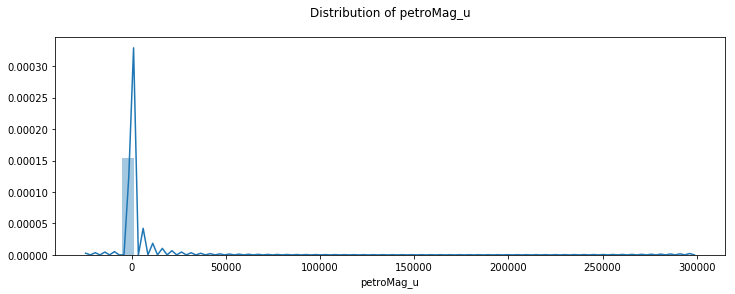

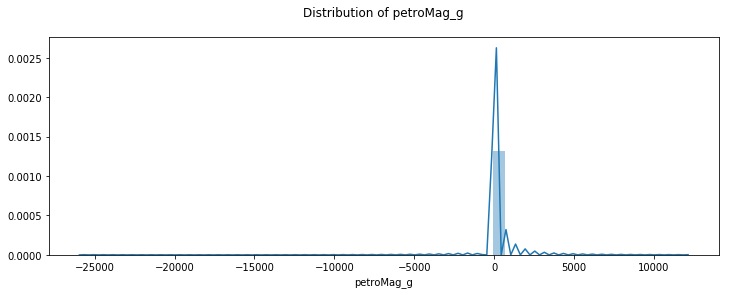

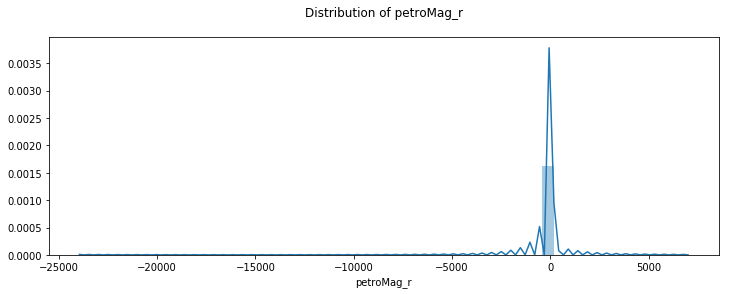

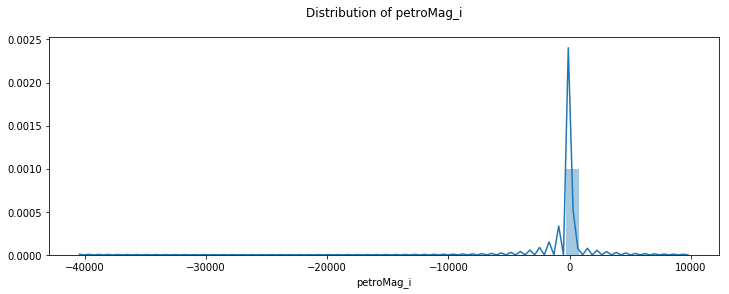

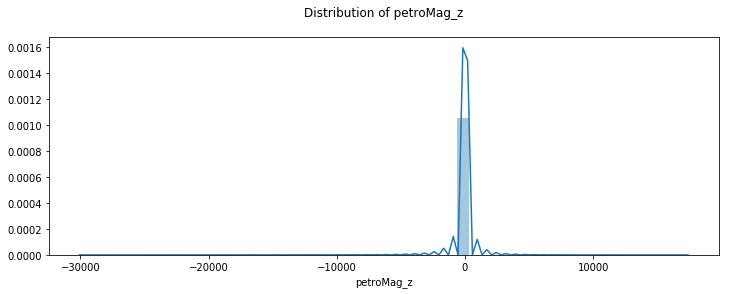

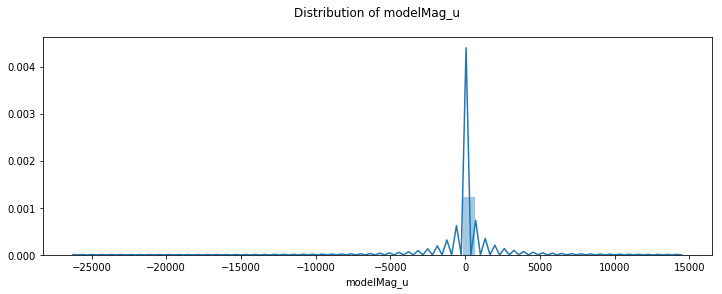

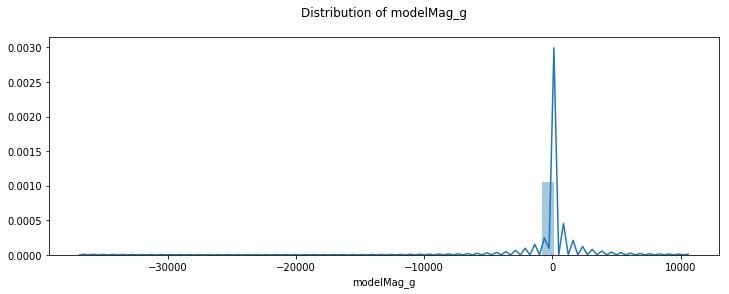

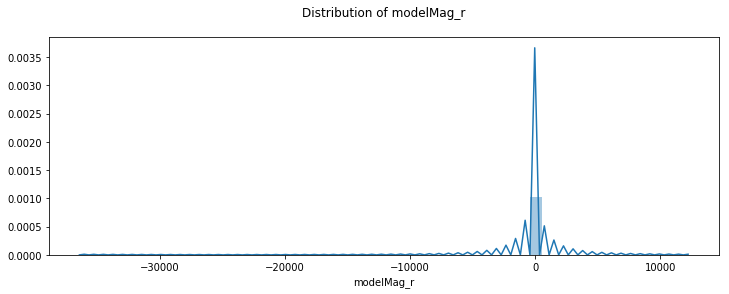

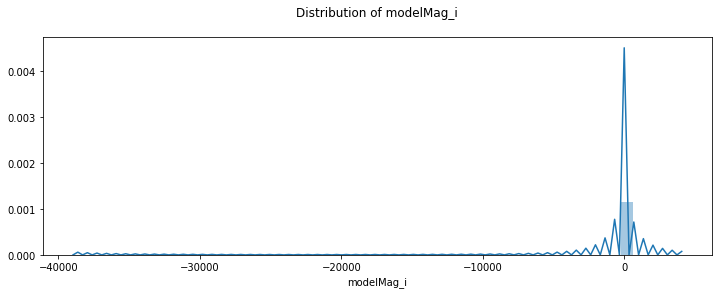

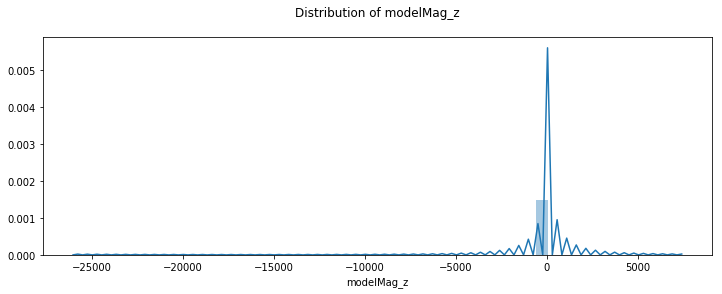

In [18]:
print(len(features))
for col in features :
    plt.figure(figsize=(12,4))
    sns.distplot(df[col])
    plt.title('Distribution of %s\n'%col)

In [19]:
분포 확인 결과
1. fiberMag_u 와 psfMag_u 가 두개의 분포형태를 가지고 있음.
2. 대부분의 분포들이 평균에서 매우 떨어져있는 아웃라이어를 가지고 있음을 알 수 있음
3. 주로 모든 아웃라이어들은 양방향으로 분포해있기 보다 한방향으로 분포해 있음을 알 수 있음

SyntaxError: invalid syntax (<ipython-input-19-8dc28c7f6700>, line 1)

천체 타입에 따른 변수간의 상관관계

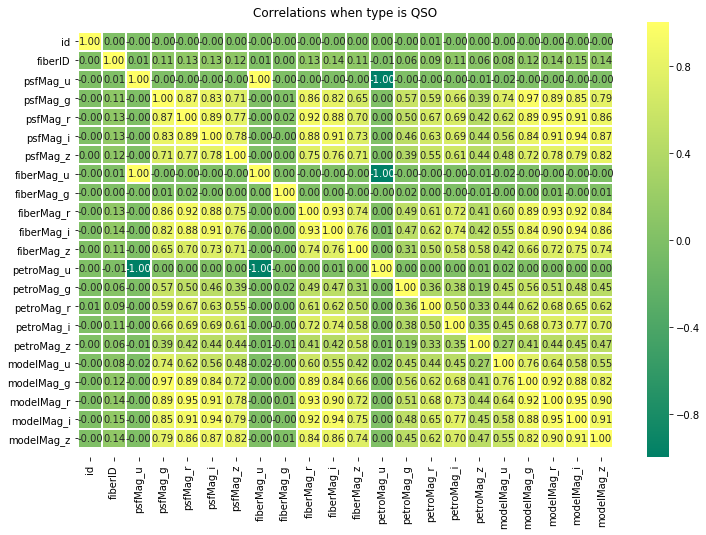

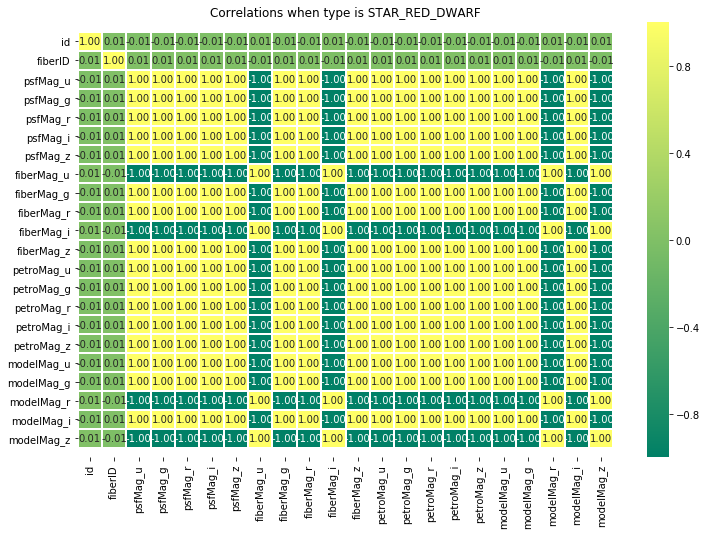

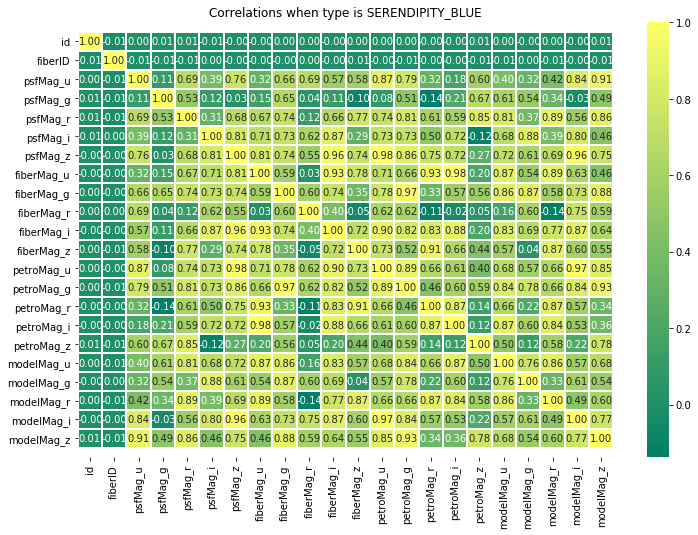

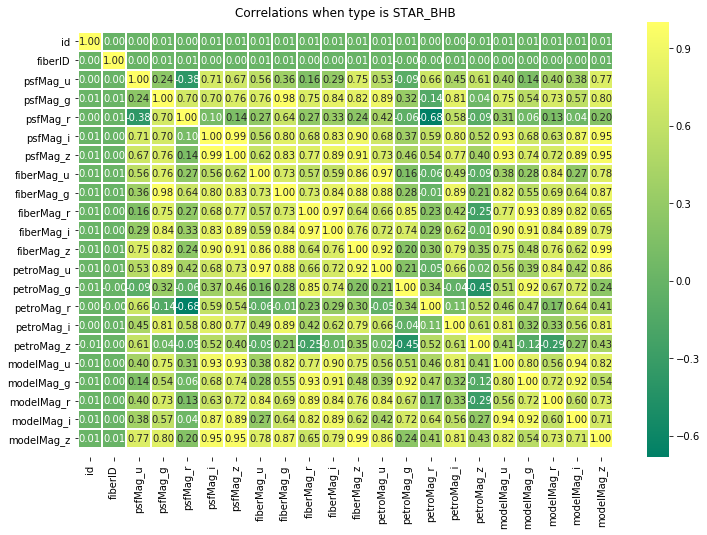

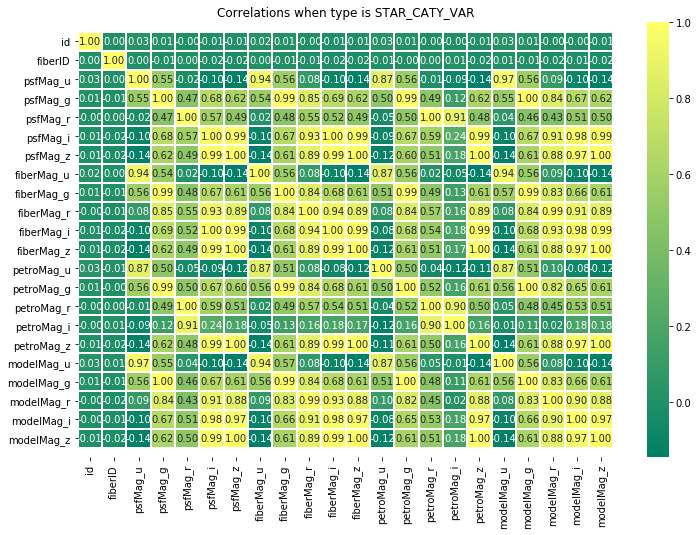

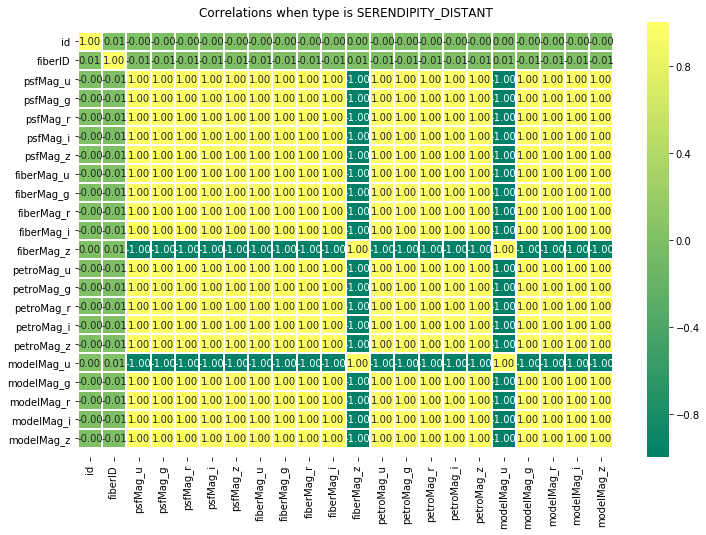

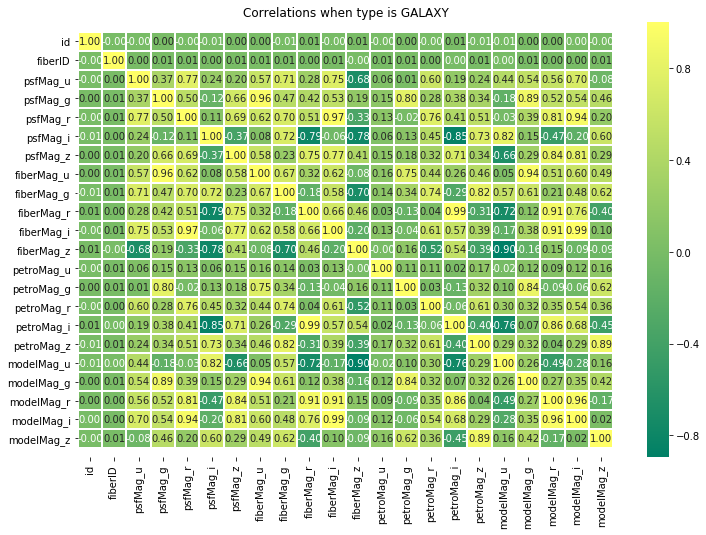

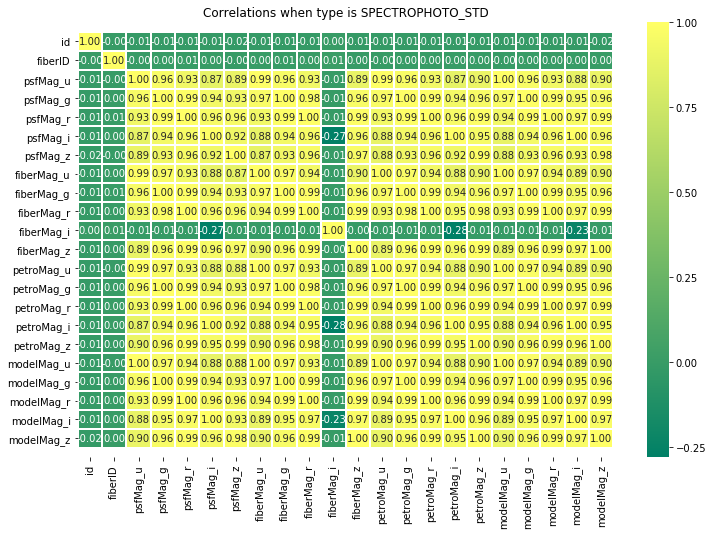

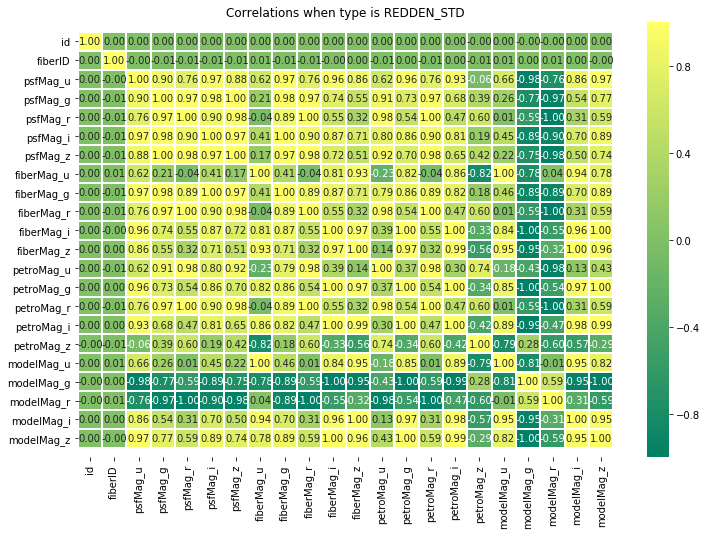

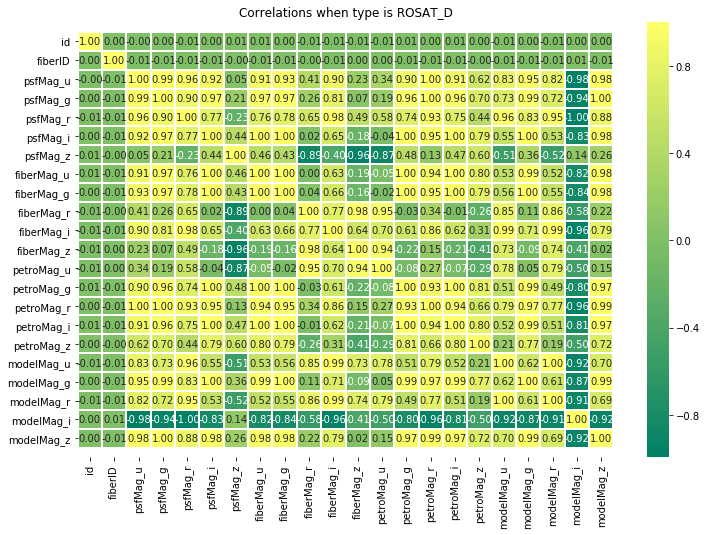

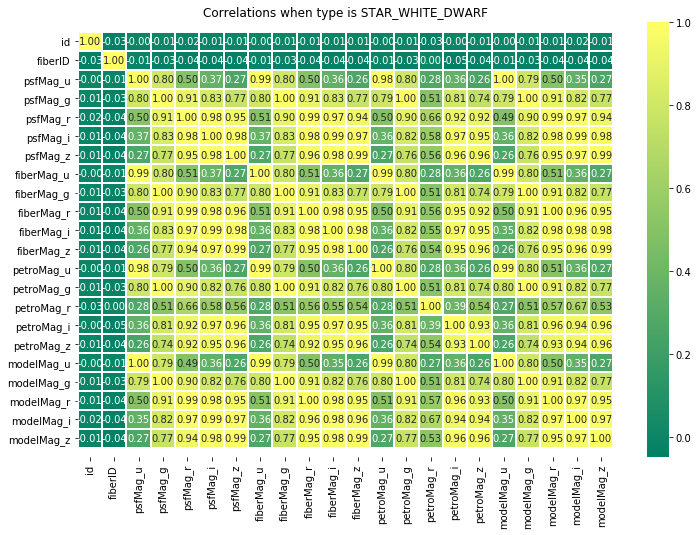

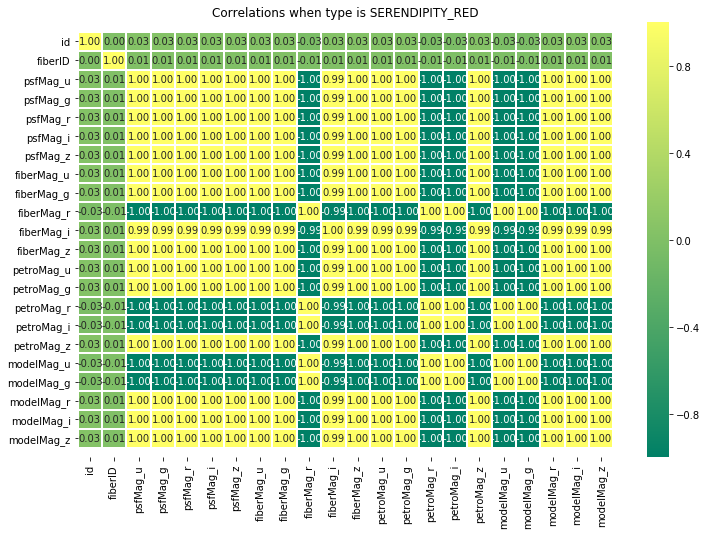

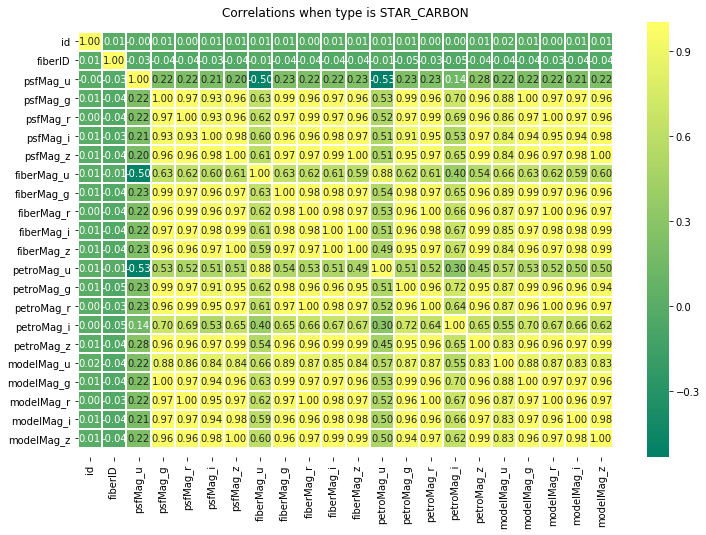

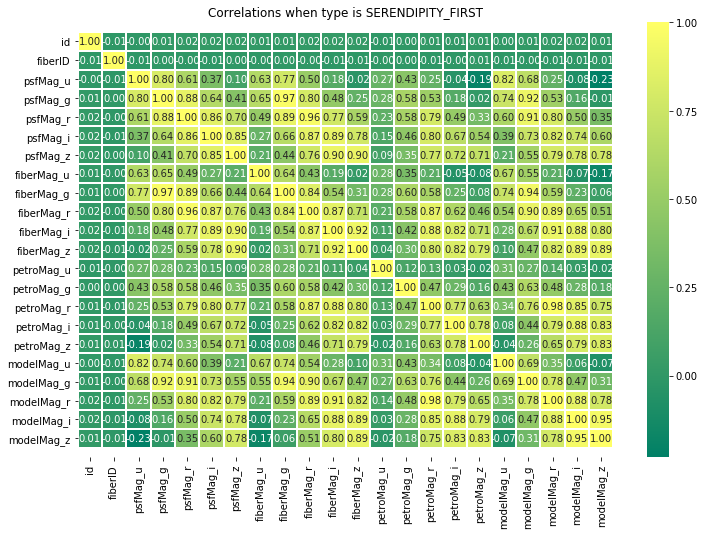

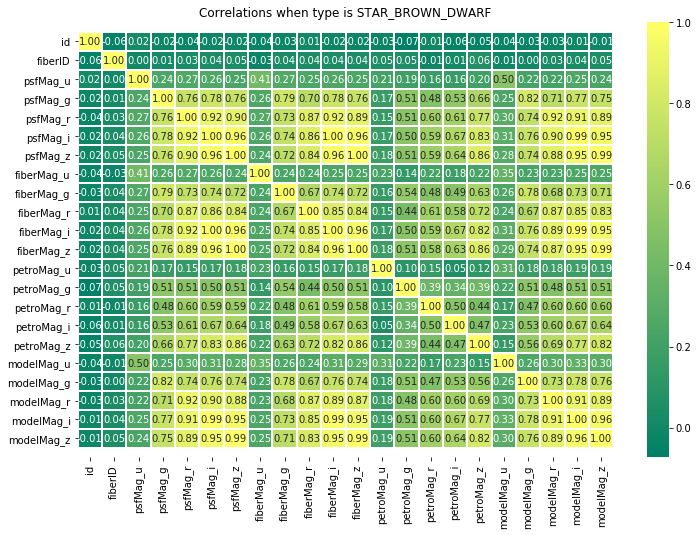

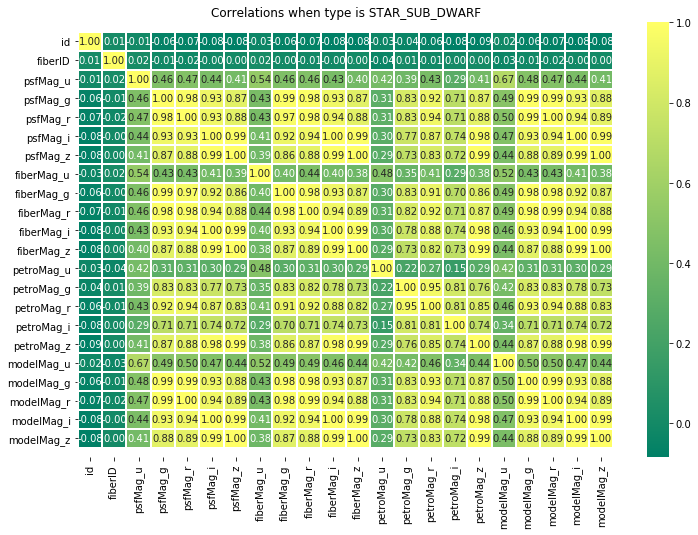

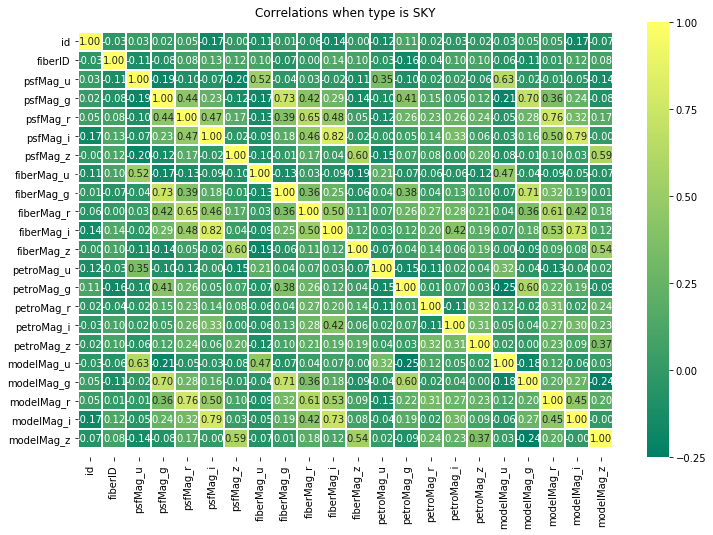

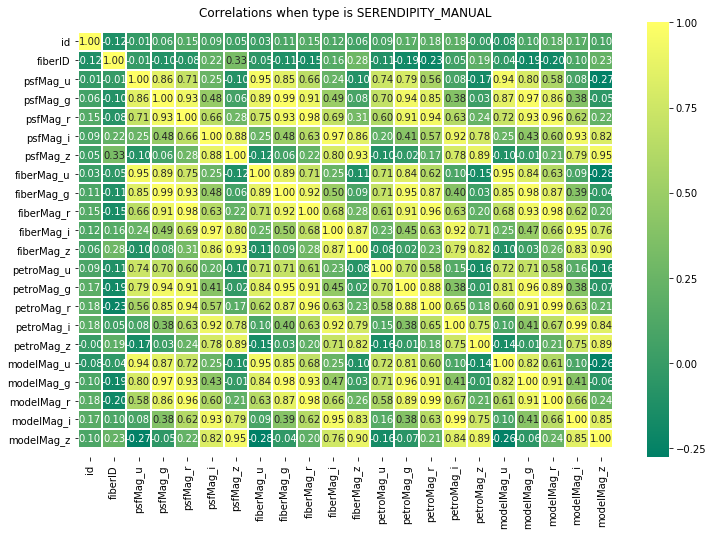

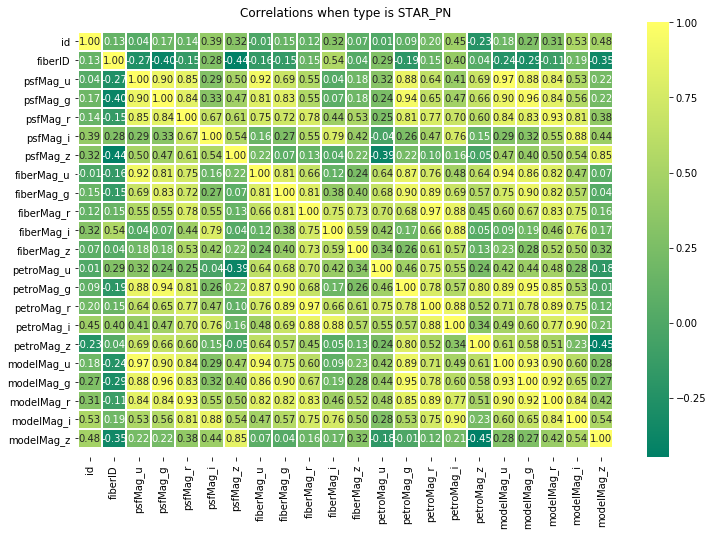

In [12]:
for x in types:    
    plt.figure(figsize=(12,8))
    ax =  sns.heatmap(df[df['type'] == x].corr(method='pearson'), annot = True,   
                fmt = '.2f',linewidths = 1, cmap="summer")
    buttom, top = ax.get_ylim()
    ax.set_ylim(buttom + 0.5, top - 0.5)
    plt.title("Correlations when type is %s"%x)

데이터의 outlier값을 가지고 있는 천체 타입에 대한 정보 확인 (진행중)

위에서 데이터 타이별 상관관계를 확인해보면 
가로 세로 직선으로 진한 부분들을 관찰 할 수 있는데
이는 하나의 특징이 다른 모든 특징들과 매우 강한 상관관계를 가지고 있다는 것을 의미한다.
특징이 일대일로 강한 상관관계를 가지고 있는것은 가능한 일이지만 
하나의 특징이 다른 모든 특징들과 매우 강한 상관관계를 가지는 것은 거의 불가능한 상황이다.
이에 대한 원인으로 두가지를 생각하였다

1. 특징이 매우 큰 outliers 값을 가지기 때문에 다른 특징들과의 수리적 계산에서 강한 상관관계를 초래한다.
2. 타입 샘플의 개수가 적어서 

In [13]:
out_data = pd.DataFrame()
for col in features :
    Q1 = df[col].quantile(0.1)
    Q3 = df[col].quantile(0.9)
    IQR = Q3 - Q1
    data = df[ (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][['type', col]]
    data = data.groupby(['type']).count()
    print(data)

Empty DataFrame
Columns: [fiberID]
Index: []
                     psfMag_u
type                         
GALAXY                     27
QSO                        20
REDDEN_STD                  2
ROSAT_D                    24
SERENDIPITY_BLUE            4
SERENDIPITY_DISTANT         1
SERENDIPITY_FIRST           1
SERENDIPITY_RED             2
STAR_BHB                    5
STAR_CARBON                 1
STAR_RED_DWARF              3
                     psfMag_g
type                         
GALAXY                     32
QSO                         5
REDDEN_STD                  2
ROSAT_D                    17
SERENDIPITY_BLUE            5
SERENDIPITY_DISTANT         1
SERENDIPITY_RED             1
STAR_BHB                    4
STAR_RED_DWARF              2
                     psfMag_r
type                         
GALAXY                     21
QSO                        11
REDDEN_STD                  2
ROSAT_D                    21
SERENDIPITY_BLUE            6
SERENDIPITY_DISTANT      